In [1]:
import cv2
import glob
import copy
import math
import numpy as np
import imageio
import matplotlib.pyplot as plt

from pprint import pprint as pp
import os

In [2]:
def load_images(filenames): # we load the images
    return [imageio.imread(filename) for filename in filenames]

In [3]:
filenames = glob.glob('calibration/*.jpg')
imagenes_calibracion = load_images(filenames)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_30148\3656941205.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


In [4]:
### For plotting the images
# for img in imagenes_calibracion:
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

No corners detected in image


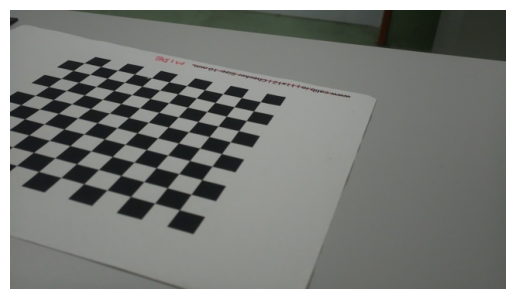

In [5]:
corners = []
for img in imagenes_calibracion: # we find the corners in each image
    corns = cv2.findChessboardCorners(img, (11,10), None) 
    if corns == (False, None):
        print("No corners detected in image")
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    corners.append(corns) # we append the corners to a list where we will store all the corners for each image

In [6]:
imgs2 = copy.deepcopy(imagenes_calibracion) # we make a copy of the images to draw the corners

tmp = [cv2.drawChessboardCorners(img, (11,10), cor[1], cor[0]) for img, cor in zip(imgs2, corners) if cor[0]] # we draw the corners in the images

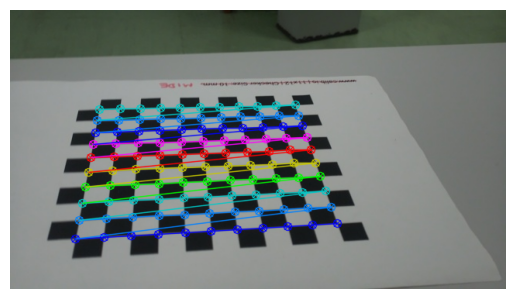

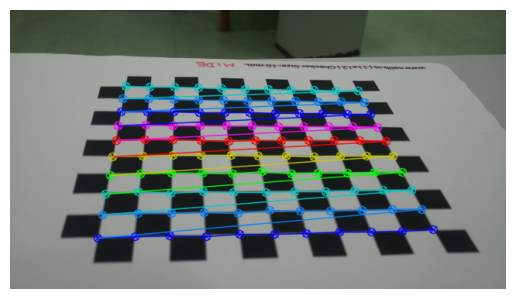

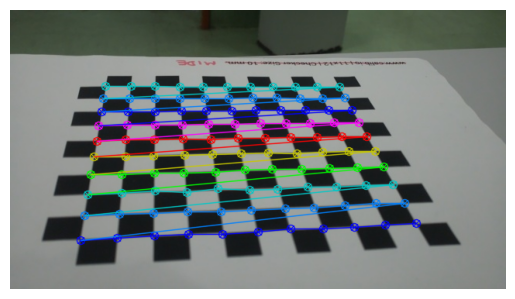

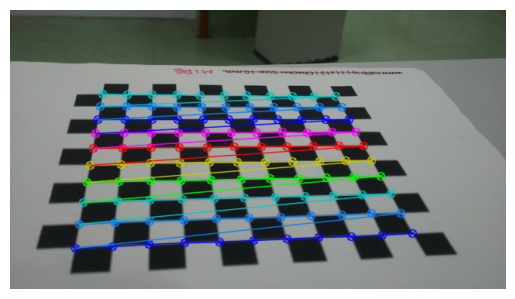

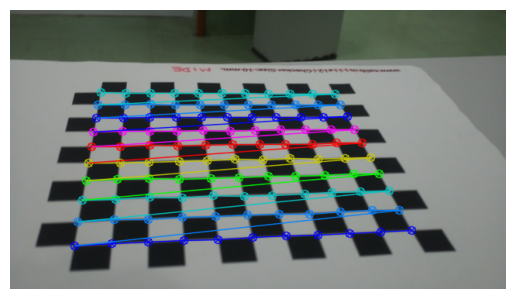

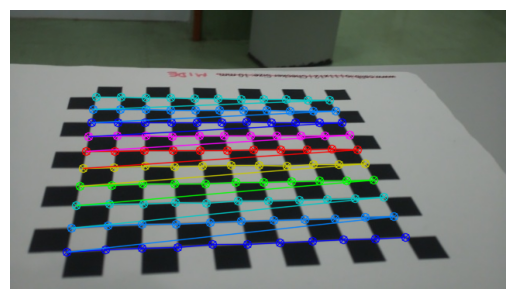

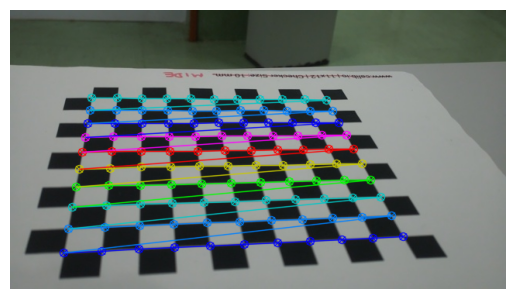

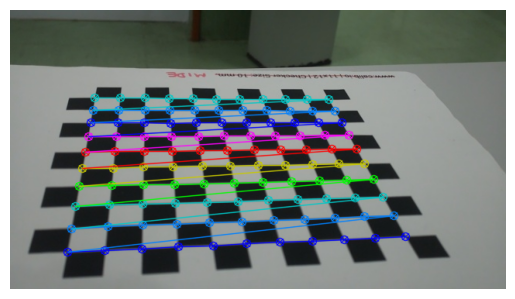

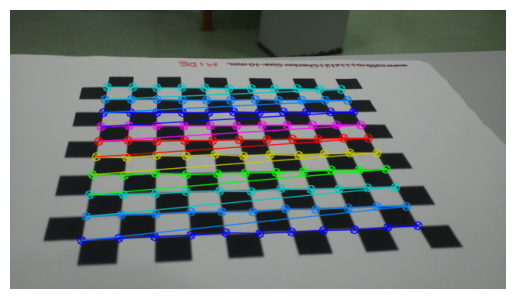

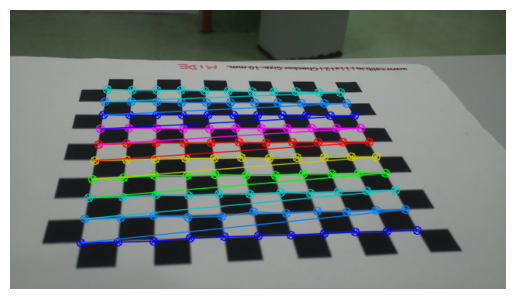

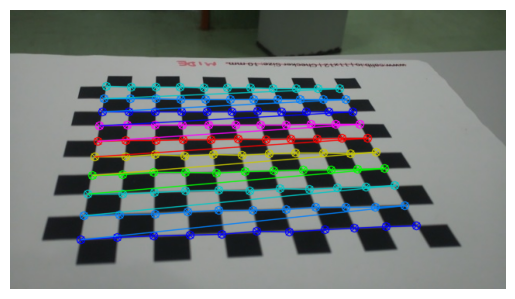

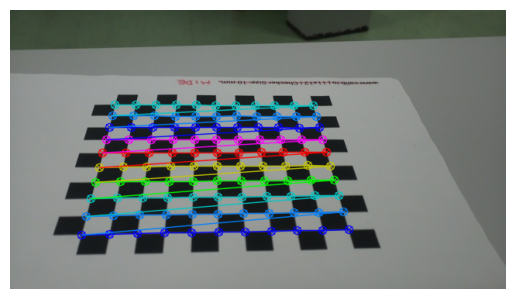

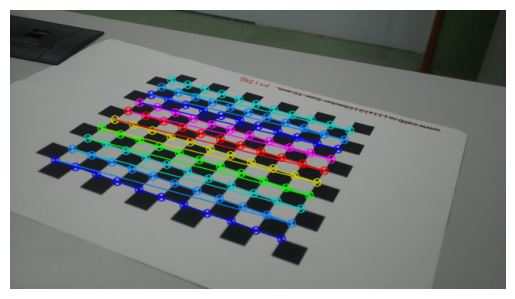

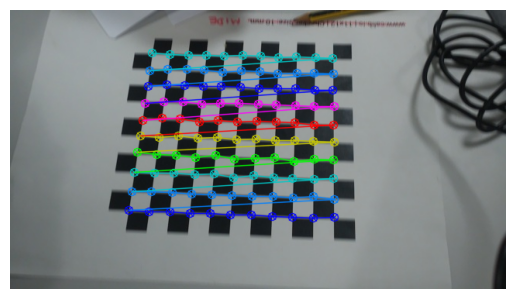

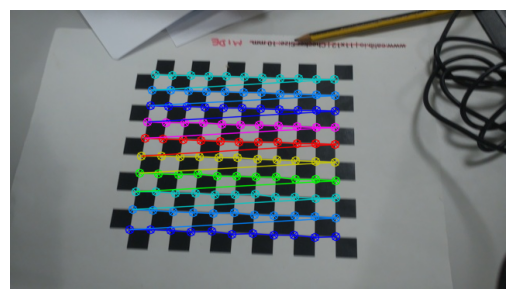

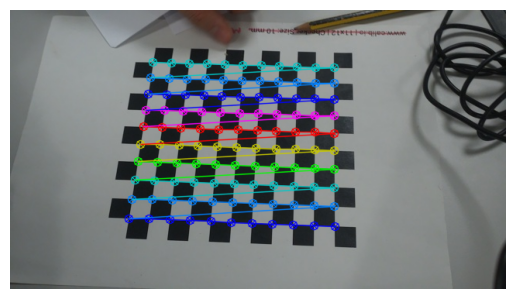

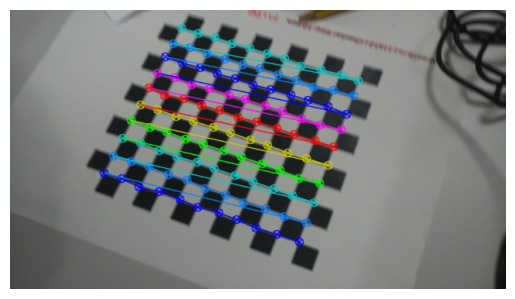

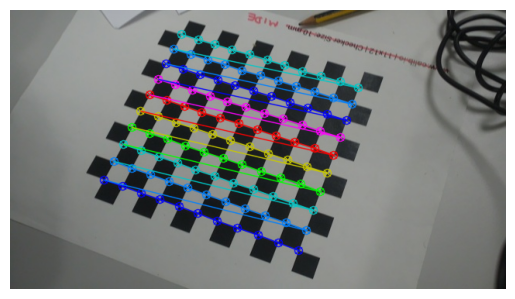

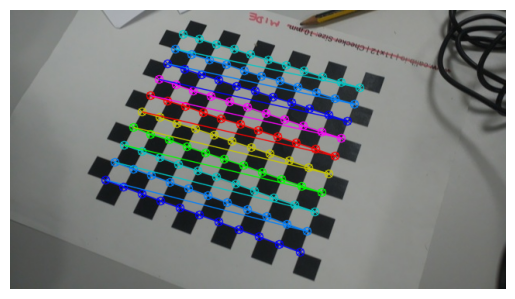

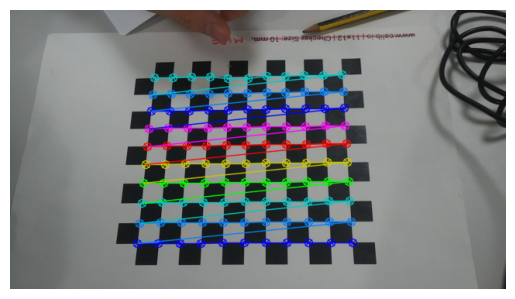

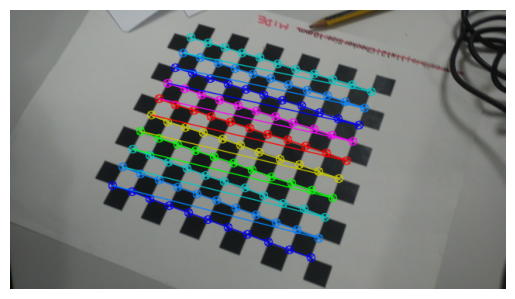

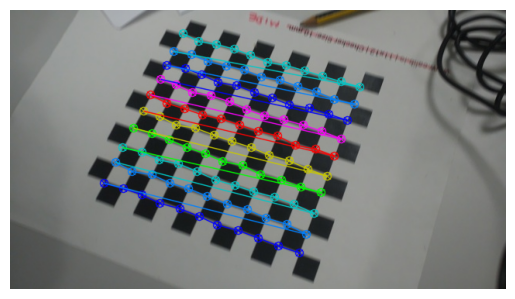

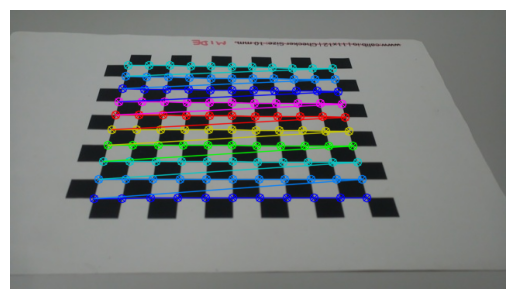

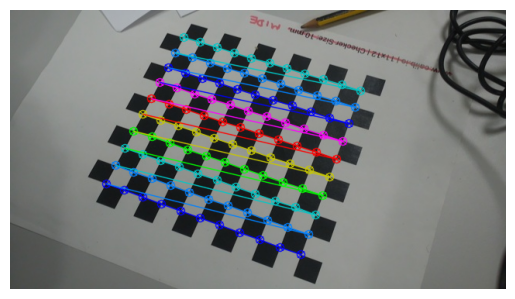

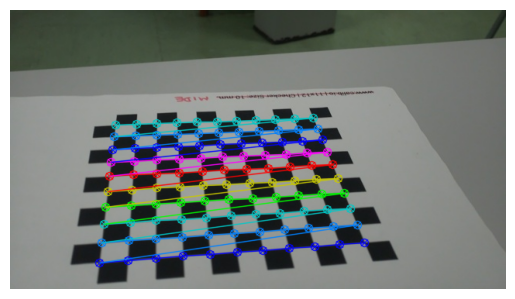

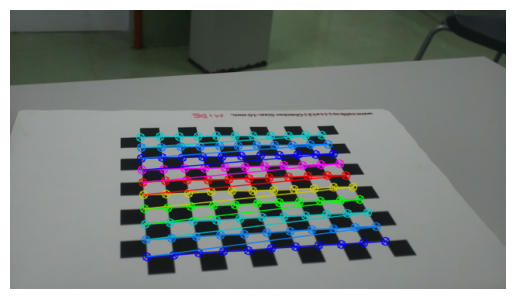

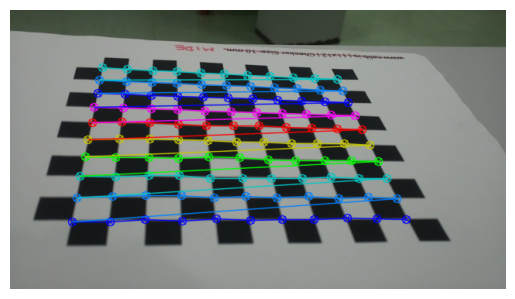

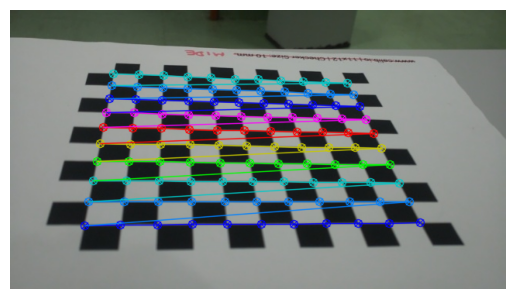

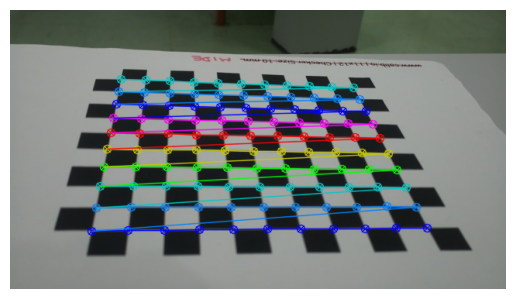

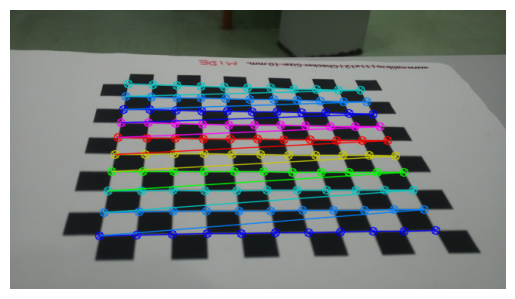

In [7]:
for img in tmp: # we plot the images with the corners
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    


In [8]:
def get_chessboard_points(chessboard_shape, dx, dy): # we get the points of the chessboard
    return [[(i%chessboard_shape[0])*dx, (i//chessboard_shape[0])*dy, 0] for i in range(np.prod(chessboard_shape))] 

cb_points = get_chessboard_points((11, 10), 14, 14) 

In [9]:
# We are going to retrieve existing corners (cor[0] == True)
valid_corners = [cor[1] for cor in corners if cor[0]]

num_valid_images = len(valid_corners)

# Matrix with the coordinates of the corners
real_points = get_chessboard_points((11, 10), 14, 14)

# We are going to convert our coordinates list in the reference system to numpy array
object_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

# Convert the corners list to array
image_points = np.asarray(valid_corners, dtype=np.float32)

# Calibrate
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, imagenes_calibracion[1].shape[0:2], None, None)
# Calculate extrinsecs matrix using Rodigues on each rotation vector addid its translation vector
extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))
# Save the calibration file
np.savez('calib_left', intrinsic=intrinsics, extrinsic=extrinsics)

# Lets print some outputs
print("Corners standard intrinsics:\n",intrinsics)
print("Corners standard extrinsics:\n",extrinsics)
print("Corners standard dist_coefs:\n", dist_coeffs)

print("root mean sqaure reprojection error:\n", rms)
np.shape(extrinsics)

Corners standard intrinsics:
 [[643.5676128    0.         329.02828778]
 [  0.         683.83069295 300.43414557]
 [  0.           0.           1.        ]]
Corners standard extrinsics:
 [array([[-9.87946324e-01, -1.43991684e-01, -5.68195005e-02,
         4.01462422e+01],
       [ 5.73590901e-02, -6.81454278e-01,  7.29609486e-01,
        -1.02332560e+01],
       [-1.43777590e-01,  7.17555895e-01,  6.81499481e-01,
         2.78708751e+02]]), array([[-9.89256545e-01, -1.23022705e-01, -7.89740661e-02,
         7.26850763e+01],
       [ 2.26710929e-02, -6.62781707e-01,  7.48469392e-01,
        -5.16929898e+00],
       [-1.44421295e-01,  7.38637816e-01,  6.58450200e-01,
         2.16535619e+02]]), array([[-9.84400927e-01, -1.57625850e-01, -7.81594987e-02,
         6.56654860e+01],
       [ 4.69067914e-02, -6.63290277e-01,  7.46890729e-01,
        -7.82152553e+00],
       [-1.69571722e-01,  7.31573714e-01,  6.60337287e-01,
         2.18577965e+02]]), array([[-9.83560109e-01, -1.58977594e-01,

(30, 3, 4)